In [1]:
import sys
sys.path.append('/TFM/')

In [2]:
from sklearn.externals import joblib
import numpy as np
from TFM.validation import get_last_period_result
from TFM.plots import plot_binary_roc_curve, plot_adjustment
import matplotlib.pylab as plt
import pandas as pd

In [34]:
can_valid_ids = joblib.load('MODEL10_ALL/can_validation_ids.pickle')
nocan_valid_ids = joblib.load('MODEL10_ALL/nocan_validation_ids.pickle')

In [36]:
len(can_valid_ids + nocan_valid_ids)

7813

In [3]:
results_model10_train_val = joblib.load('MODEL10_ALL/results_model7.pickle')

In [4]:
results_model10_train_val

[[0, 0, 0.75951, 0.72838, 0.453],
 [0, 768, 0.72646, 0.69322, 0.44],
 [0, 1536, 0.69537, 0.65884, 0.392],
 [0, 2304, 0.65654, 0.6272, 0.321],
 [0, 3072, 0.62787, 0.59405, 0.276],
 [0, 3840, 0.59812, 0.56156, 0.252],
 [0, 4608, 0.55685, 0.52979, 0.24],
 [0, 5376, 0.53223, 0.49863, 0.233],
 [0, 6144, 0.50329, 0.46786, 0.229],
 [0, 6912, 0.47386, 0.43729, 0.227],
 [0, 7680, 0.44129, 0.40685, 0.225],
 [0, 8448, 0.4021, 0.37658, 0.224],
 [0, 9216, 0.38064, 0.34686, 0.223],
 [0, 9984, 0.34957, 0.31829, 0.221],
 [0, 10752, 0.32535, 0.29093, 0.22],
 [0, 11520, 0.29628, 0.26508, 0.219],
 [0, 12288, 0.26621, 0.24115, 0.218],
 [0, 13056, 0.24052, 0.219, 0.217],
 [0, 13824, 0.21383, 0.19914, 0.217],
 [0, 14592, 0.21114, 0.18126, 0.216],
 [0, 15360, 0.17812, 0.16573, 0.217],
 [0, 16128, 0.16508, 0.15245, 0.217],
 [0, 16896, 0.15298, 0.14118, 0.217],
 [0, 17664, 0.1368, 0.13205, 0.219],
 [0, 18432, 0.1271, 0.12476, 0.22],
 [0, 19200, 0.12317, 0.11922, 0.222],
 [0, 19968, 0.10539, 0.11521, 0.224],
 [

In [6]:
loss_train = []
for i in range(len(results_model10_train_val)):
    loss_train.append(results_model10_train_val[i][2]) 

In [7]:
loss_val = []
for i in range(len(results_model10_train_val)):
    loss_val.append(results_model10_train_val[i][3]) 

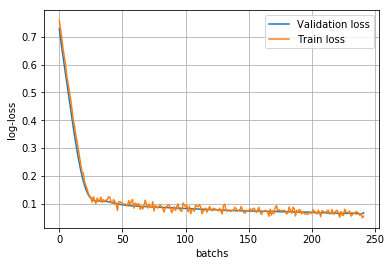

In [9]:
plt.plot(loss_val, label = "Validation loss")
plt.plot(loss_train, label = "Train loss")
plt.legend()
plt.grid()
plt.ylabel('log-loss')
plt.xlabel('batchs')
plt.show()

In [21]:
results_model10_train_val

[[0, 0, 0.75951, 0.72838, 0.453],
 [0, 768, 0.72646, 0.69322, 0.44],
 [0, 1536, 0.69537, 0.65884, 0.392],
 [0, 2304, 0.65654, 0.6272, 0.321],
 [0, 3072, 0.62787, 0.59405, 0.276],
 [0, 3840, 0.59812, 0.56156, 0.252],
 [0, 4608, 0.55685, 0.52979, 0.24],
 [0, 5376, 0.53223, 0.49863, 0.233],
 [0, 6144, 0.50329, 0.46786, 0.229],
 [0, 6912, 0.47386, 0.43729, 0.227],
 [0, 7680, 0.44129, 0.40685, 0.225],
 [0, 8448, 0.4021, 0.37658, 0.224],
 [0, 9216, 0.38064, 0.34686, 0.223],
 [0, 9984, 0.34957, 0.31829, 0.221],
 [0, 10752, 0.32535, 0.29093, 0.22],
 [0, 11520, 0.29628, 0.26508, 0.219],
 [0, 12288, 0.26621, 0.24115, 0.218],
 [0, 13056, 0.24052, 0.219, 0.217],
 [0, 13824, 0.21383, 0.19914, 0.217],
 [0, 14592, 0.21114, 0.18126, 0.216],
 [0, 15360, 0.17812, 0.16573, 0.217],
 [0, 16128, 0.16508, 0.15245, 0.217],
 [0, 16896, 0.15298, 0.14118, 0.217],
 [0, 17664, 0.1368, 0.13205, 0.219],
 [0, 18432, 0.1271, 0.12476, 0.22],
 [0, 19200, 0.12317, 0.11922, 0.222],
 [0, 19968, 0.10539, 0.11521, 0.224],
 [

In [11]:
y_val = joblib.load('MODEL10_ALL/val_y_model7.pickle')
scores_val = joblib.load('MODEL10_ALL/ALL_scores_val_model7.pickle')

In [33]:
len(y_val)/11

22.0

In [40]:
375024/7813

48.0

In [41]:
len(y_val)

242

In [39]:
aux = None

for e in y_val:
    if aux != e.shape:
        print(e.shape)
    aux = e.shape

(375024,)


In [42]:
rval = get_last_period_result(y_val[-1], scores_val[-1], 48)
rval['y'].sum()

491.0

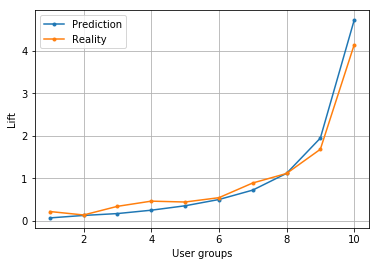

In [45]:
plot_adjustment(rval, target_name='y', score_name='score', groups=10,
lift=True, display_table=False)

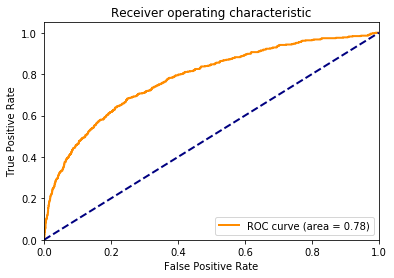

In [43]:
plot_binary_roc_curve(y_test=rval['y'], y_score=rval['score'])

In [46]:
y_test = joblib.load('MODEL10_ALL/ALL_res_test_model10.pickle')
scores_test = joblib.load('MODEL10_ALL/ALL_scores_test10.pickle')

In [47]:
rtest = get_last_period_result(y_test, scores_test, 48)
rtest['y'].sum()

412.0

In [6]:
rtest.head()

,y,score
47,0.0,0.023481
95,0.0,0.004181
143,0.0,0.033821
191,0.0,0.022488
239,0.0,0.003396


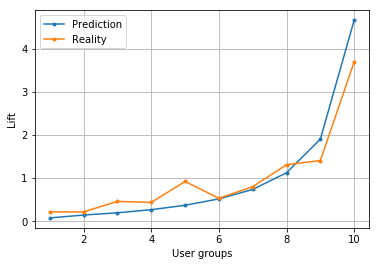

In [48]:
plot_adjustment(rtest, target_name='y', score_name='score', groups=10,
lift=True, display_table=False)

,y,score,size,real_lift,pred_lift
group,,,,,
1,0.001938,0.001228,4643,0.218395,0.078629
2,0.001938,0.002266,4643,0.218395,0.145034
3,0.004092,0.003081,4643,0.461055,0.197204
4,0.003877,0.004206,4643,0.436789,0.269263
5,0.008184,0.005800,4643,0.922110,0.371258
6,0.004738,0.008096,4643,0.533853,0.518223
7,0.007107,0.011535,4643,0.800780,0.738400
8,0.011630,0.017564,4643,1.310367,1.124297
9,0.012492,0.029713,4643,1.407431,1.901967


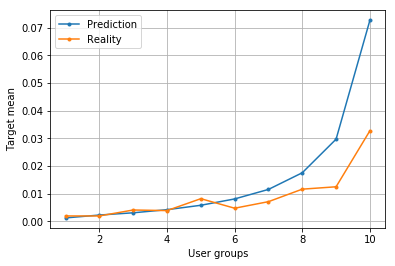

In [49]:
plot_adjustment(rtest, target_name='y', score_name='score', groups=10,
lift=False, display_table=True)

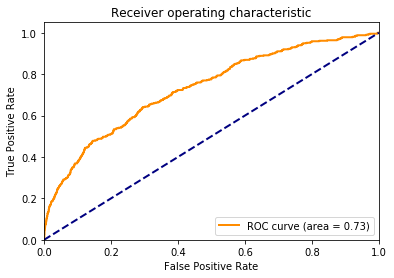

In [50]:
plot_binary_roc_curve(y_test=rtest['y'], y_score=rtest['score'])